UAS KOMPUTASI STATISTIKA (B) \
KELOMPOK J

Anggota :
1. Adha Abdullah
2. Haikal Fikri Rabani
3. Jolin Fransius
4. Muhammad Adli Rahmat Solihin
5. Yiesha Reyhani Ghozali

Task:

1. Lakukan penelaahan Data (Eksplorasi & preprocessing) pada data yang diberikan (Data Wrangling, Statistika Deksriptif, & Aggregate).
2. Menggunakan algoritma k-Means ( tanpa module ) dan sembarang rumus jarak yang bersesuaian, lakukan clustering (k=4) pada data yang diberikan. Parameter lain (dan variabel selection/engineering) bebas ditentukan oleh masing-masing kelompok (disertai penjelasan).
3. Bandingkan code di Poin (2) dengan dan tanpa pemrograman parallel.
4. Dari hasil Poin (1) & (2) ada informasi/insight apa saja dari data yang bisa didapatkan.

Indeks Massa Tubuh (IMT) adalah suatu pengukuran yang umum digunakan untuk mengevaluasi proporsi berat badan seseorang  terhadap tinggi badannya. IMT dapat memberikan gambaran tentang tingkat obesitas atau kekurangan berat badan seseorang, dan sering digunakan sebagai indikator kasar kesehatan tubuh. Di samping itu, pola hidup sehat juga merupakan faktor kunci dalam menjaga kesehatan tubuh secara keseluruhan. Oleh karena itu, kami tertarik untuk meneliti bagaimana pengelompokan faktor-faktor pola hidup dengan kondisi tubuh seperti IMT, berat badan, dll.

# TASK 1
Penelaahan Data

## Import Data

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import chardet

#Untuk Explore dan Preprocessing Data
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import external
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/16OtLnKSv5z9mD-yE7EPfS09C1oUPGmXJ/view?usp=drive_link'
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('data_kesehatan-Mental-SRQ-2023--Filtered.csv')
df= pd.read_csv('data_kesehatan-Mental-SRQ-2023--Filtered.csv')
pd.set_option("display.max_columns", None)
df.index = range(1, len(df) + 1)
df

<ipython-input-102-ee884c7d5436>:6: DtypeWarning: Columns (6,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data_kesehatan-Mental-SRQ-2023--Filtered.csv')


ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
1            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
2            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
3            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
4            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
5            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289797  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289798  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289799  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289800  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289801  289801   JABAR   LAKI - LAKI  19.0            1.0                 SMA   

       TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  \
1             168.9         85.0             100.0           Menikah   
2             169.5         70.0              80.0           Menikah   
3             169.5         60.0              78.0     Belum Menikah   
4             166.8         80.0              34.0           Menikah   
5             164.5         62.0              32.0           Menikah   
...             ...          ...               ...               ...   
289797          169         60.0              78.0           Menikah   
289798          155         60.0              62.0           Menikah   
289799          575         57.0              28.0           Menikah   
289800          179         55.0              68.0           Menikah   
289801          171        100.0              33.0     Belum Menikah   

              PENGELUARAN/BULAN  \
1       Rp. 7 Juta s.d. 10 Juta   
2        Rp. 2 Juta s.d. 6 Juta   
3        Rp. 2 Juta s.d. 6 Juta   
4       Rp. 7 Juta s.d. 10 Juta   
5        Rp. 2 Juta s.d. 6 Juta   
...                         ...   
289797   Rp. 2 Juta s.d. 6 Juta   
289798   Rp. 2 Juta s.d. 6 Juta   
289799   Rp. 2 Juta s.d. 6 Juta   
289800   Rp. 2 Juta s.d. 6 Juta   
289801   Rp. 2 Juta s.d. 6 Juta   

       Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
1                                                   Tidak                    
2                                                   Tidak                    
3                                                   Tidak                    
4                                                   Tidak                    
5                                                   Tidak                    
...                                                   ...                    
289797                                              Tidak                    
289798                                              Tidak                    
289799                                              Tidak                    
289800                                              Tidak                    
289801                                              Tidak                    

       Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
1                                                   Tidak                   
2                                                   Tidak                   
3                                                   Tidak                   
4                                                   Tidak                   
5                                                   Tidak                   
...                                                   ...                   
289797                                              Tidak                   
289798                                              Tidak                   
289799                                              Tidak                   
289800                                        

## Statistika Deskriptif

In [ ]:
df.describe

<bound method NDFrame.describe of             ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
1            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
2            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
3            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
4            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
5            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289797  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289798  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289799  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289800  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289801  289801   JABAR   LAKI - LAKI  19.0            1.0                 S

In [ ]:
df.describe()

ID          USIA  LAMA BERDINAS    BERAT BADAN  \
count  289801.000000  2.898010e+05   2.898010e+05  289801.000000   
mean   144901.000000  4.317251e+02   5.984390e+02      96.176577   
std     83658.487018  7.551491e+04   1.201622e+05     887.911773   
min         1.000000  1.500000e+01   0.000000e+00       1.000000   
25%     72451.000000  2.900000e+01   9.000000e+00      66.000000   
50%    144901.000000  3.800000e+01   1.800000e+01      72.000000   
75%    217351.000000  4.400000e+01   2.300000e+01      80.000000   
max    289801.000000  2.309198e+07   3.101201e+07   90210.000000   

       LINGKAR PINGGANG  
count     289801.000000  
mean          65.558079  
std          188.430313  
min          -75.000000  
25%           36.000000  
50%           73.000000  
75%           84.000000  
max       100000.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 1 to 289801
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

In [ ]:
# Menghitung nilai unik dari setiap kolom
unique_values = df.nunique()

# Menampilkan nilai unik untuk setiap kolom
for column, value in unique_values.iteritems():
    print(f'Kolom: {column}, Jumlah Nilai Unik: {value}')

Kolom: ID, Jumlah Nilai Unik: 289801
Kolom: WILAYAH, Jumlah Nilai Unik: 34
Kolom: JENIS KELAMIN, Jumlah Nilai Unik: 2
Kolom: USIA, Jumlah Nilai Unik: 130
Kolom: LAMA BERDINAS, Jumlah Nilai Unik: 180
Kolom: PENDIDIKAN TERAKHIR, Jumlah Nilai Unik: 6
Kolom: TINGGI BADAN, Jumlah Nilai Unik: 283
Kolom: BERAT BADAN, Jumlah Nilai Unik: 740
Kolom: LINGKAR PINGGANG, Jumlah Nilai Unik: 249
Kolom: Status Perkawinan, Jumlah Nilai Unik: 4
Kolom: PENGELUARAN/BULAN, Jumlah Nilai Unik: 4
Kolom: Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?, Jumlah Nilai Unik: 2
Kolom: Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?, Jumlah Nilai Unik: 2
Kolom: Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?, Jumlah Nilai Unik: 2
Kolom: Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?, Jumlah Nilai Unik: 2
Kolom: Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?, Jumlah Nilai Unik: 2
Kolom: Apakah saudara pernah

<ipython-input-106-5942c3981793>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in unique_values.iteritems():


## Visualisasi Data

In [ ]:
cat_features = ['WILAYAH', 'JENIS KELAMIN', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?',
                'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?',
                'Sering menderita sakit kepala ?',
                'Tidak nafsu makan ?',
                'Sulit tidur ?',
                'Mudah takut ?',
                'Merasa tegang, cemas atau kuatir ?',
                'Tangan anda gemetar ?',
                'Pencernaan anda terganggu / buruk ?',
                'Sulit untuk berpikir jernih ?',
                'Merasa tidak bahagia ?',
                'Menangis lebih sering ?',
                'Merasa sulit untuk menikmati kegiatan sehari – hari?',
                'Sulit untuk mengambil keputusan ?',
                'Pekerjaan anda sehari – hari terganggu ?',
                'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?',
                'Kehilangan minat pada berbagai hal ?',
                'Tidak merasa berharga?',
                'Mempunyai pikiran untuk mengakhiri hidup?',
                'Merasa lelah sepanjang waktu?',
                'Mengalami rasa tidak enak di perut?',
                'Mudah lelah ?',
                'Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)',
                'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?',
                'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?',
                'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?',
                'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?',
                'Berapa lama saudara mandi ?',
                'Apakah saudara merokok ?',
                'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?',
                'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?',
                'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari',
                'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?',
                'Dalam sehari, berapa kali Saudara mengganti pakaian dalam?',
                'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?',
                'IMT']

In [ ]:
len(cat_features)

59

In [ ]:
fig, ax = plt.subplots(10, 6, figsize=(100,300), constrained_layout=True)
for i in range(10):
    for j in range(6):
        if 6*i + j < len(cat_features):
            df[cat_features[6*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=16)
            ax[i, j].set_title(cat_features[6*i + j], size=20)

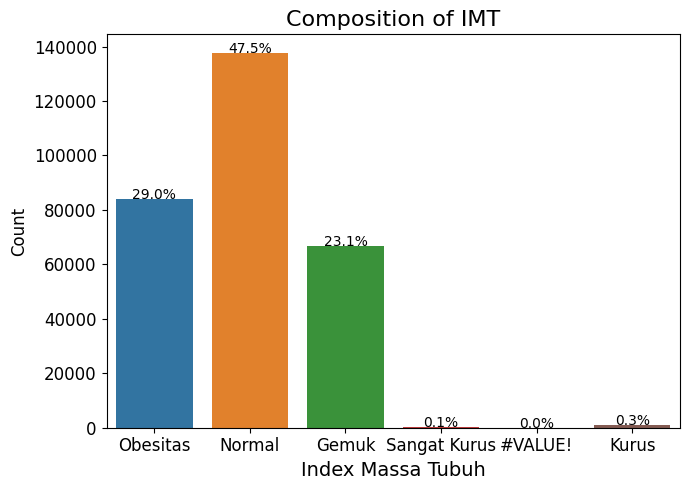

In [ ]:
plt.figure(figsize =(7,5))
ax = sns.countplot(data = df, x = 'IMT')
plt.xticks(size = 12)
plt.xlabel('Index Massa Tubuh', size = 14)
plt.yticks(size = 12)
plt.ylabel('Count', size = 12)
plt.title("Composition of IMT", size = 16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center");

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.show()

Dari visualisasi di atas, terlihat bahwa mayoritas memiliki IMT yang tergolong normal

##Preprocessing Data
- Menangani Outlier dan Missing Value
- Ecnode Variabel Kategorik

In [ ]:
df = df.rename(columns={
                'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?': 'olahraga',
                'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?': 'konsumsi air',
                'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?': 'konsumsi buah/sayur',
                'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?': 'mandi',
                'Berapa lama saudara mandi ?': 'durasi_mandi',
                'Apakah saudara merokok ?': 'merokok',
                'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?': 'konsumsi gula',
                'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?': 'konsumsi alkohol',
                'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari': 'konsumsi junk food',
                'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?': 'gosok gigi',
                'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?': 'cuci tangan'})

print(df)

            ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
1            1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
2            2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
3            3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
4            4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
5            5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   
...        ...     ...           ...   ...            ...                 ...   
289797  289797  KALSEL   LAKI - LAKI  23.0            4.0                 SMA   
289798  289798  JATENG     PEREMPUAN  54.0           27.0                 SMA   
289799  289799  SUMSEL   LAKI - LAKI  51.0           51.0                 SMA   
289800  289800   JABAR   LAKI - LAKI  35.0           17.0                 SMA   
289801  289801   JABAR   LAKI - LAKI  19.0            1.0                 SMA   

       TINGGI BADAN  BERAT 

In [ ]:
#PEMILIHAN VARIABEL
df = df[['JENIS KELAMIN','TINGGI BADAN', 'BERAT BADAN','USIA','NILAI IMT',
        'olahraga', 'konsumsi air', 'konsumsi buah/sayur', 'mandi',
        'durasi_mandi', 'merokok', 'konsumsi gula', 'konsumsi alkohol',
        'konsumsi junk food','gosok gigi', 'cuci tangan']]

In [ ]:
df['TINGGI BADAN'] = pd.to_numeric(df['TINGGI BADAN'], errors = 'coerce')
df['BERAT BADAN'] = pd.to_numeric(df['BERAT BADAN'], errors = 'coerce')
df['NILAI IMT'] = pd.to_numeric(df['NILAI IMT'], errors = 'coerce')

In [ ]:
kolom_numerik = df.select_dtypes(include=['int', 'float']).columns

for kolom in kolom_numerik:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas untuk deteksi outlier
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Mendeteksi dan menghapus outlier
    df = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df.head()

JENIS KELAMIN  TINGGI BADAN  BERAT BADAN  USIA  NILAI IMT  \
1   LAKI - LAKI         168.9         85.0  34.0      29.80   
2   LAKI - LAKI         169.5         70.0  43.0      24.36   
3   LAKI - LAKI         169.5         60.0  21.0      20.88   
4   LAKI - LAKI         166.8         80.0  40.0      28.75   
5   LAKI - LAKI         164.5         62.0  28.0      22.91   

                            olahraga        konsumsi air konsumsi buah/sayur  \
1   4 kali atau lebih dalam seminggu  Lebih dari 2 liter   Kurang dari 400gr   
2   4 kali atau lebih dalam seminggu  Lebih dari 2 liter   Kurang dari 400gr   
3   4 kali atau lebih dalam seminggu             2 Liter         400gr/lebih   
4  Kurang dari 4 kali dalam seminggu             2 Liter   Kurang dari 400gr   
5  Kurang dari 4 kali dalam seminggu             2 Liter   Kurang dari 400gr   

      mandi durasi_mandi merokok             konsumsi gula konsumsi alkohol  \
1  > 2 Kali  2 - 5 menit      Ya  Kurang dari 6 sendok teh     Tidak pernah   
2    2 Kali    > 5 menit   Tidak              Tidak pernah     Tidak pernah   
3    2 Kali  2 - 5 menit   Tidak  Kurang dari 6 sendok teh     Tidak pernah   
4    2 Kali  2 - 5 menit   Tidak   Lebih dari 6 sendok teh     Tidak pernah   
5    2 Kali    > 5 menit      Ya  Kurang dari 6 sendok teh     Tidak pernah   

  konsumsi junk food gosok gigi      cuci tangan  
1    1 - 2 kali/hari   > 2 Kali           Selalu  
2       Tidak pernah     2 Kali           Selalu  
3    1 - 2 kali/hari     2 Kali           Selalu  
4    1 - 2 kali/hari     2 Kali  Kadang - kadang  
5    1 - 2 kali/hari   > 2 Kali           Selalu

In [ ]:
# Mengubah semua fitur kategorik menjadi numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes("object"):
    df[col] = le.fit_transform(df[col])

In [ ]:
df

JENIS KELAMIN  TINGGI BADAN  BERAT BADAN  USIA  NILAI IMT  olahraga  \
1                   0         168.9         85.0  34.0      29.80         0   
2                   0         169.5         70.0  43.0      24.36         0   
3                   0         169.5         60.0  21.0      20.88         0   
4                   0         166.8         80.0  40.0      28.75         1   
5                   0         164.5         62.0  28.0      22.91         1   
...               ...           ...          ...   ...        ...       ...   
289793              0         167.0         60.0  38.0      21.51         1   
289794              0         169.0         60.0  29.0      21.01         1   
289795              0         169.0         60.0  46.0      21.01         1   
289796              0         169.0         60.0  53.0      21.01         0   
289797              0         169.0         60.0  23.0      21.01         0   

        konsumsi air  konsumsi buah/sayur  mandi  durasi_mandi  merokok  \
1                  2                    1      2             0        1   
2                  2                    1      1             1        0   
3                  0                    0      1             0        0   
4                  0                    1      1             0        0   
5                  0                    1      1             1        1   
...              ...                  ...    ...           ...      ...   
289793             2                    1      1             0        0   
289794             2                    0      0             0        0   
289795             0                    0      1             0        1   
289796             2                    0      1             0        1   
289797             2                    0      2             0        0   

        konsumsi gula  konsumsi alkohol  konsumsi junk food  gosok gigi  \
1                   0                 1                   0           2   
2                   2                 1                   2           1   
3                   0                 1                   0           1   
4                   1                 1                   0           1   
5                   0                 1                   0           2   
...               ...               ...                 ...         ...   
289793              2                 1                   2           2   
289794              0                 1                   0           0   
289795              0                 1                   2           2   
289796              0                 1                   2           2   
289797              0                 0                   0           0   

        cuci tangan  
1                 1  
2                 1  
3                 1  
4                 0  
5                 1  
...             ...  
289793            0  
289794            0  
289795            1  
289796            1  
289797            0  

[268544 rows x 16 columns]

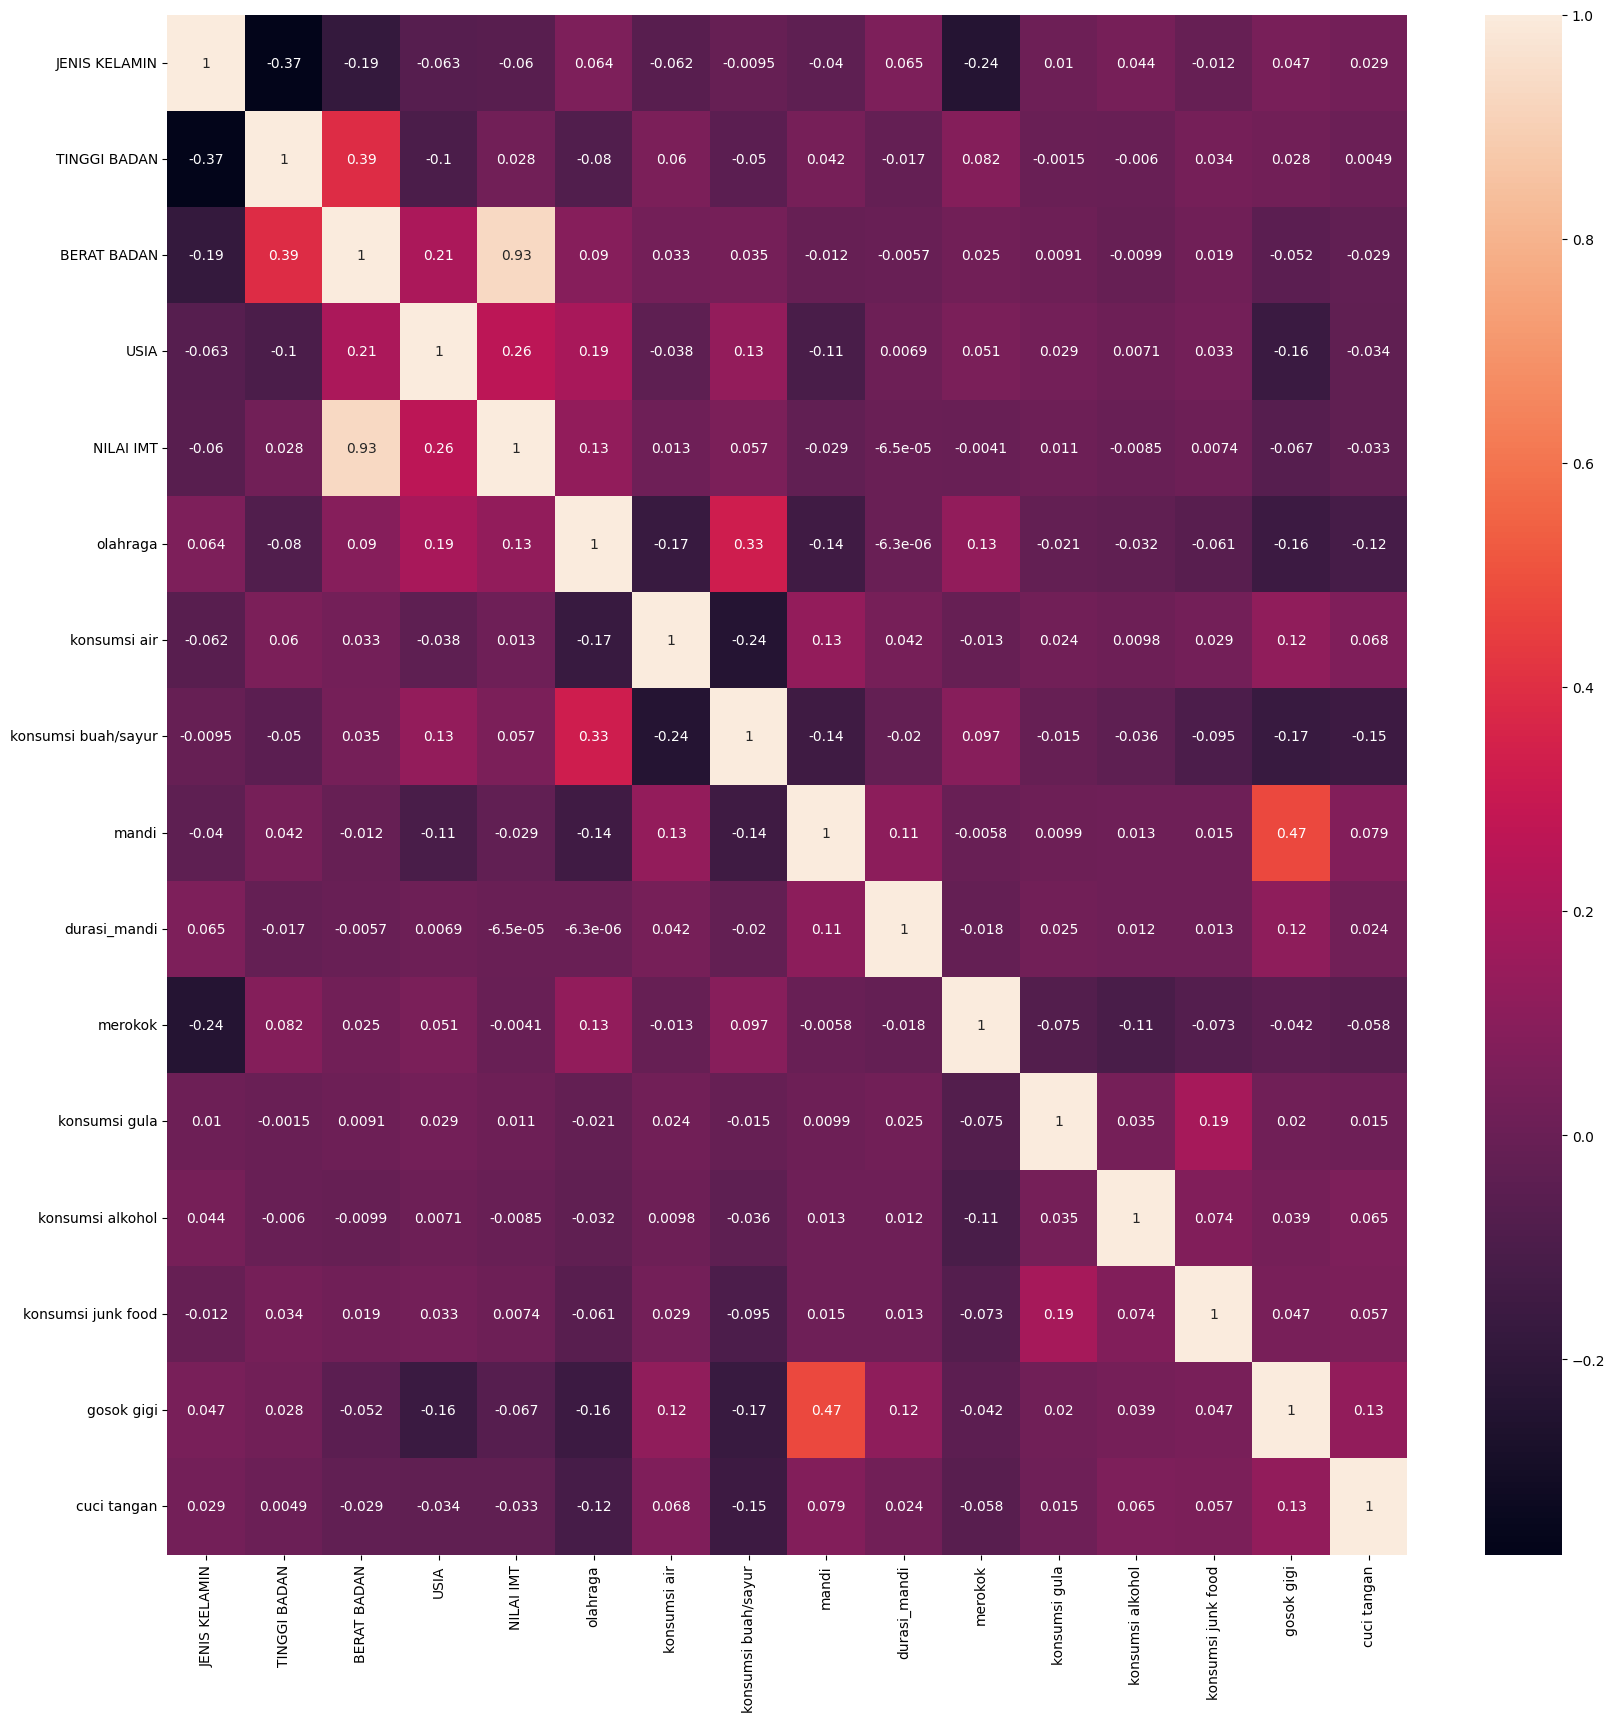

In [ ]:
plt.figure(figsize=(20, 20))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.describe()

JENIS KELAMIN   TINGGI BADAN    BERAT BADAN           USIA  \
count  268544.000000  268544.000000  268544.000000  268544.000000   
mean        0.057633     169.421749      72.689561      36.874438   
std         0.233049       3.823783       9.028125       9.786696   
min         0.000000     159.500000      45.000000      15.000000   
25%         0.000000     167.000000      66.000000      29.000000   
50%         0.000000     170.000000      72.000000      38.000000   
75%         0.000000     172.000000      80.000000      44.000000   
max         1.000000     179.500000     101.000000      66.000000   

           NILAI IMT       olahraga   konsumsi air  konsumsi buah/sayur  \
count  268544.000000  268544.000000  268544.000000        268544.000000   
mean       25.307553       0.665444       1.330925             0.501579   
std         2.897393       0.545504       0.891414             0.518333   
min        17.240000       0.000000       0.000000             0.000000   
25%        23.310000       0.000000       0.000000             0.000000   
50%        25.100000       1.000000       2.000000             0.000000   
75%        27.340000       1.000000       2.000000             1.000000   
max        33.430000       2.000000       2.000000             2.000000   

               mandi   durasi_mandi        merokok  konsumsi gula  \
count  268544.000000  268544.000000  268544.000000  268544.000000   
mean        1.246079       0.455333       0.483474       0.253418   
std         0.455140       0.539079       0.499728       0.635934   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         2.000000       1.000000       1.000000       0.000000   
max         3.000000       2.000000       1.000000       2.000000   

       konsumsi alkohol  konsumsi junk food     gosok gigi    cuci tangan  
count     268544.000000       268544.000000  268544.000000  268544.000000  
mean           0.959444            0.674508       1.314593       0.902694  
std            0.212788            0.930399       0.524813       0.308032  
min            0.000000            0.000000       0.000000       0.000000  
25%            1.000000            0.000000       1.000000       1.000000  
50%            1.000000            0.000000       1.000000       1.000000  
75%            1.000000            2.000000       2.000000       1.000000  
max            2.000000            2.000000       3.000000       2.000000

In [ ]:
df['NILAI IMT'].dtype

dtype('float64')

In [ ]:
df[["TINGGI BADAN", "BERAT BADAN", "NILAI IMT", "USIA"]].describe()

TINGGI BADAN    BERAT BADAN      NILAI IMT           USIA
count  268544.000000  268544.000000  268544.000000  268544.000000
mean      169.421749      72.689561      25.307553      36.874438
std         3.823783       9.028125       2.897393       9.786696
min       159.500000      45.000000      17.240000      15.000000
25%       167.000000      66.000000      23.310000      29.000000
50%       170.000000      72.000000      25.100000      38.000000
75%       172.000000      80.000000      27.340000      44.000000
max       179.500000     101.000000      33.430000      66.000000

In [ ]:
missing_value = df.isnull().sum()
print(missing_value)

JENIS KELAMIN          0
TINGGI BADAN           0
BERAT BADAN            0
USIA                   0
NILAI IMT              0
olahraga               0
konsumsi air           0
konsumsi buah/sayur    0
mandi                  0
durasi_mandi           0
merokok                0
konsumsi gula          0
konsumsi alkohol       0
konsumsi junk food     0
gosok gigi             0
cuci tangan            0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
missing_value = df.isnull().sum()
print(missing_value)

JENIS KELAMIN          0
TINGGI BADAN           0
BERAT BADAN            0
USIA                   0
NILAI IMT              0
olahraga               0
konsumsi air           0
konsumsi buah/sayur    0
mandi                  0
durasi_mandi           0
merokok                0
konsumsi gula          0
konsumsi alkohol       0
konsumsi junk food     0
gosok gigi             0
cuci tangan            0
dtype: int64


Dilakukan penanganan untuk missing value. Proses ini dilakukan dengan menghapus baris yang terdapat missing value menggunakan perintah .dropna(). Terlihat bahwa pada data tidak ditemukan adanya missing values.

## Data Aggregation

Dilaksanakan agregasi pada data agar dapat dengan mudah mendapatkan ringkasan statistik dari dataset dan dapat merangkum data menjadi informasi yang lebih ringkas

In [ ]:
aggregations = {
    'TINGGI BADAN': ['mean', 'min', 'max'],
    'BERAT BADAN': ['mean', 'min', 'max'],
    'USIA': ['mean', 'min', 'max'],
    'NILAI IMT': ['mean','min', 'max']
}

aggregation_result = df.agg(aggregations)
print(aggregation_result)

      TINGGI BADAN  BERAT BADAN       USIA  NILAI IMT
mean    169.421749    72.689561  36.874438  25.307553
min     159.500000    45.000000  15.000000  17.240000
max     179.500000   101.000000  66.000000  33.430000


Melakukan aggregasi berdasarkan kolom 'JENIS KELAMIN', kemudian menghitung rata-rata, nilai minimum, dan nilai maksimum dari kolom 'NILAI IMT' untuk setiap kelompok 'JENIS KELAMIN'

Dari agregasi tersebut, terlihat bahwa rata-rata memiliki nilai IMT yang masih tergolong normal, yaitu 25

In [ ]:
df.groupby('JENIS KELAMIN').agg({'NILAI IMT': ['mean','min', 'max']})

NILAI IMT              
                    mean    min    max
JENIS KELAMIN                         
0              25.350814  17.24  33.43
1              24.600186  17.26  33.43

Pada jenis kelamin, 0 melambangkan laki-laki dan 1 melambangkan perempuan. Terlihat bahwa IMT laki-laki lebih tinggi dibandingkan perempuan

In [ ]:
df.groupby('JENIS KELAMIN').agg(aggregations)

TINGGI BADAN               BERAT BADAN                    USIA  \
                      mean    min    max        mean   min    max       mean   
JENIS KELAMIN                                                                  
0               169.775730  160.0  179.5   73.105289  45.0  101.0  37.027850   
1               163.633747  159.5  179.0   65.891923  45.0  100.0  34.365962   

                           NILAI IMT                
                min   max       mean    min    max  
JENIS KELAMIN                                       
0              15.0  66.0  25.350814  17.24  33.43  
1              15.0  66.0  24.600186  17.26  33.43

## Prepare Data For Model
- Pemilihan fitur

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm_features = df[['TINGGI BADAN', 'BERAT BADAN', 'USIA', 'NILAI IMT']]
mm_features = mm.fit_transform(mm_features)

In [ ]:
mm_features

array([[0.47      , 0.71428571, 0.37254902, 0.77578752],
       [0.5       , 0.44642857, 0.54901961, 0.43977764],
       [0.5       , 0.26785714, 0.11764706, 0.22483014],
       ...,
       [0.475     , 0.26785714, 0.60784314, 0.23285979],
       [0.475     , 0.26785714, 0.74509804, 0.23285979],
       [0.475     , 0.26785714, 0.15686275, 0.23285979]])

In [ ]:
data=df

data['TINGGI BADAN'] = data['TINGGI BADAN'].astype(float)
data['BERAT BADAN'] = data['BERAT BADAN'].astype(float)
data['USIA'] = data['USIA'].astype(float)
data['NILAI IMT'] = data['NILAI IMT'].astype(float)

#TASK 2

In [ ]:
from tqdm.notebook import tqdm

## Function

In [ ]:
# class KMeansClustering:
#     def __init__(self, n_clusters, max_iter=100):
#         self.n_clusters = n_clusters
#         self.max_iter = max_iter
#         self.centroids = None

#     def initialize_centroids(self, data):
#         np.random.seed(0)
#         random_indices = np.random.permutation(data.shape[0])
#         centroids = data[random_indices[:self.n_clusters]]
#         return centroids

#     def assign_clusters(self, data, centroids):
#         distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
#         return np.argmin(distances, axis=0)

#     def update_centroids(self, data, labels):
#         centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
#         return centroids

#     def fit(self, data):
#         self.centroids = self.initialize_centroids(data)
#         for _ in tqdm(range(self.max_iter), desc='K-Means Iterations'):
#             labels = self.assign_clusters(data, self.centroids)
#             new_centroids = self.update_centroids(data, labels)
#             if np.all(new_centroids == self.centroids):
#                 break
#             self.centroids = new_centroids
#         return labels

In [ ]:
import random as rd

def KMeansClustering(df, columns_to_cluster, K=4, n_iter=10):
    X = df[columns_to_cluster].values

    m = X.shape[0]  # number of training examples
    n = X.shape[1]  # number of features

    Centroids = np.array([]).reshape(n, 0)

    for i in range(K):
        rand = rd.randint(0, m - 1)
        Centroids = np.c_[Centroids, X[rand]]

    Output = {}

    EuclideanDistance = np.array([]).reshape(m, 0)

    for _ in range(n_iter):
        # step 2.a
        EuclideanDistance = np.array([]).reshape(m, 0)
        for k in range(K):
            tempDist = np.sum((X - Centroids[:, k]) ** 2, axis=1)
            EuclideanDistance = np.c_[EuclideanDistance, tempDist]
        C = np.argmin(EuclideanDistance, axis=1) + 1
        # step 2.b
        Y = {}
        for k in range(K):
            Y[k + 1] = np.array([]).reshape(n, 0)
        for i in range(m):
            Y[C[i]] = np.c_[Y[C[i]], X[i]]

        for k in range(K):
            Y[k + 1] = Y[k + 1].T

        for k in range(K):
            Centroids[:, k] = np.mean(Y[k + 1], axis=0)

    Output = Y
    return Output

## K-Means Clustering Tanpa Pemrograman Parallel

In [ ]:
columns_to_cluster = [
    ['TINGGI BADAN', 'NILAI IMT'],
    ['BERAT BADAN', 'NILAI IMT'],
    ['TINGGI BADAN', 'BERAT BADAN'],
]

import time

start_time = time.time()
results = KMeansClustering(df, columns_to_cluster=columns)
time_non_parallel = time.time() - start_time
print('durasi: ', time_non_parallel)

durasi:  103.46909713745117


Terlihat bahwa durasi waktu yang diperlukan untuk k-Means clustering tanpa menggunakan program parallel adalah 103.46909713745117

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


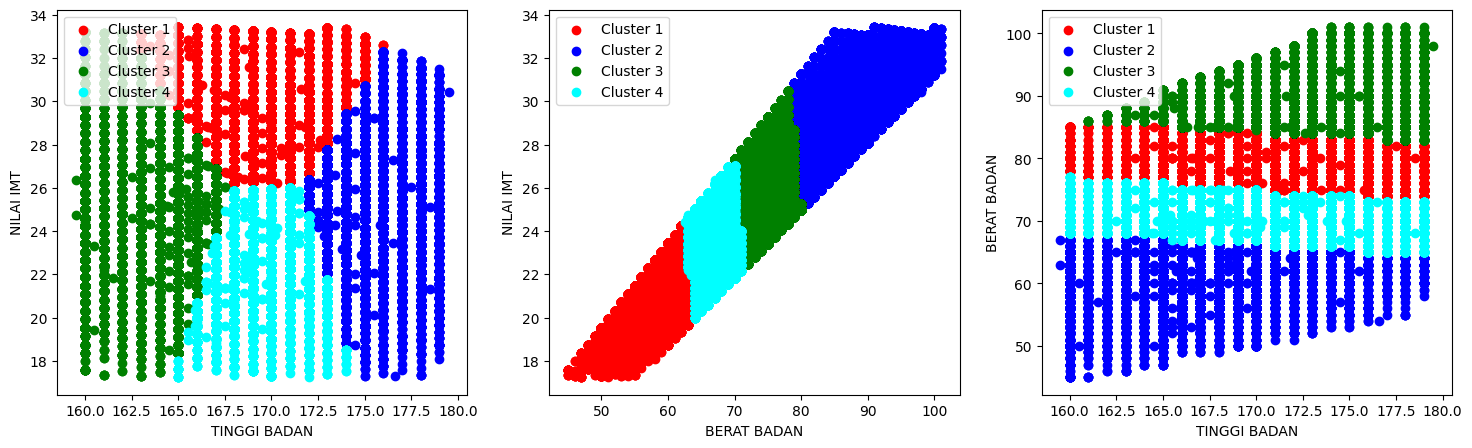

In [ ]:
columns_to_cluster = [
    ['TINGGI BADAN', 'NILAI IMT'],
    ['BERAT BADAN', 'NILAI IMT'],
    ['TINGGI BADAN', 'BERAT BADAN'],
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, columns in enumerate(columns_to_cluster):
    output_clusters = KMeansClustering(data, columns_to_cluster=columns)

    color = ['red', 'blue', 'green', 'cyan']
    labels = [f'Cluster {i+1}' for i in range(len(output_clusters))]

    for k, label in zip(output_clusters.keys(), labels):
        cluster_data = output_clusters[k]
        axes[i].scatter(cluster_data[:, 0], cluster_data[:, 1], c=color[k-1], label=label)

    axes[i].set_xlabel(columns[0])
    axes[i].set_ylabel(columns[1])
    axes[i].legend()

plt.show()

#TASK 3
- bandingkan hasil task (2) dengan dan tanpa pemrograman paralel

## K-Means Clustering Dengan Pemrograman Parallel

In [ ]:
import numpy as np
import pandas as pd
import multiprocessing as mp

def KMeansClusteringParallel(df, columns_to_cluster, K=4, n_iter=10):
    X = df[columns_to_cluster].values
    m, n = X.shape

    # Pilih centroids awal secara acak
    Centroids = X[np.random.choice(m, K, replace=False)]

    with mp.Pool() as pool:
        for _ in range(n_iter):
            # Hitung jarak Euclidean secara paralel
            EuclideanDistance = pool.starmap(
                np.sum,
                [(X - Centroid) ** 2 for Centroid in Centroids.T],
                chunksize=100  # Bagi data untuk efisiensi
            )
            EuclideanDistance = np.stack(EuclideanDistance).T

            # Tentukan cluster untuk setiap titik data
            C = np.argmin(EuclideanDistance, axis=1) + 1

            # Kumpulkan data dalam setiap cluster
            Y = {}
            for k in range(K):
                Y[k + 1] = X[C == k + 1]

            # Update centroids berdasarkan rata-rata titik data dalam setiap cluster
            Centroids = np.vstack([Y[k + 1].mean(axis=0) for k in range(K)])

    return Y

In [ ]:
columns_to_cluster = [
    ['TINGGI BADAN', 'NILAI IMT'],
    ['BERAT BADAN', 'NILAI IMT'],
    ['TINGGI BADAN', 'BERAT BADAN'],
]

import time

start_time = time.time()
results = KMeansClusteringParallel(data, columns_to_cluster=columns)
time_parallel = time.time() - start_time
print('durasi: ', time_parallel)

durasi:  0.5235445499420166


Terlihat bahwa durasi waktu yang diperlukan untuk k-Means clustering menggunakan program parallel adalah 0.5235445499420166

In [ ]:
import numpy as np
import pandas as pd
import multiprocessing as mp

def calculate_euclidean_distance(args):
    X, centroid = args
    return np.sum((X - centroid) ** 2, axis=1)

def KMeansClusteringParallel(df, columns_to_cluster, K=4, n_iter=10):
    X = df[columns_to_cluster].values
    m, n = X.shape

    # Pilih centroids awal secara acak
    Centroids = X[np.random.choice(m, K, replace=False)]

    with mp.Pool() as pool:
        for _ in range(n_iter):
            # Hitung jarak Euclidean secara paralel
            EuclideanDistance = pool.map(
                calculate_euclidean_distance,
                [(X, centroid) for centroid in Centroids],
                chunksize=100  # Bagi data untuk efisiensi
            )
            EuclideanDistance = np.stack(EuclideanDistance).T

            # Tentukan cluster untuk setiap titik data
            C = np.argmin(EuclideanDistance, axis=1) + 1

            # Kumpulkan data dalam setiap cluster
            Y = {}
            for k in range(K):
                Y[k + 1] = X[C == k + 1]

            # Update centroids berdasarkan rata-rata titik data dalam setiap cluster
            Centroids = np.vstack([Y[k + 1].mean(axis=0) for k in range(K)])

    return Y

In [ ]:
def plot_clusters(Y, columns_to_cluster):
    # Create a scatter plot for all clusters in one plot
    plt.figure(figsize=(10, 6))

    for k, cluster_data in Y.items():
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {k}')

    plt.xlabel(columns_to_cluster[0])
    plt.ylabel(columns_to_cluster[1])
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


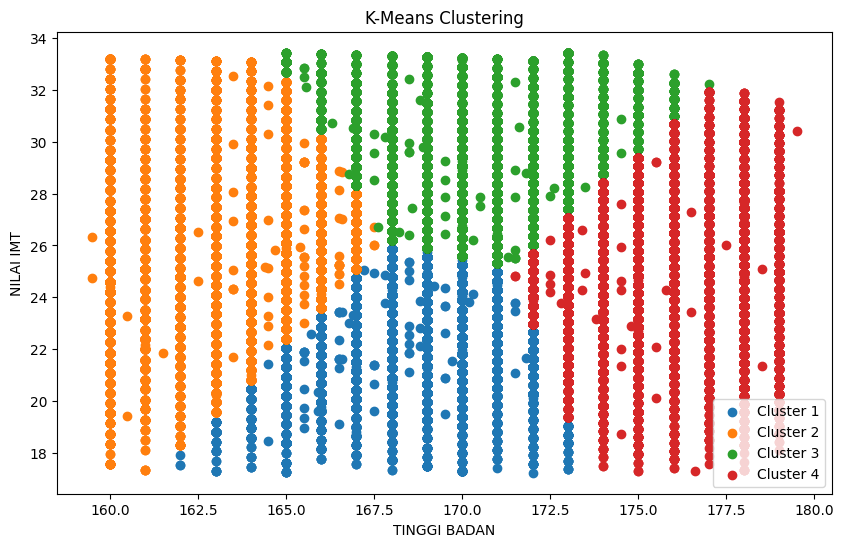

In [ ]:
columns_to_cluster = ['TINGGI BADAN', 'NILAI IMT']
Y = KMeansClusteringParallel(data, columns_to_cluster=columns_to_cluster, K=4)

plot_clusters(Y, columns_to_cluster)

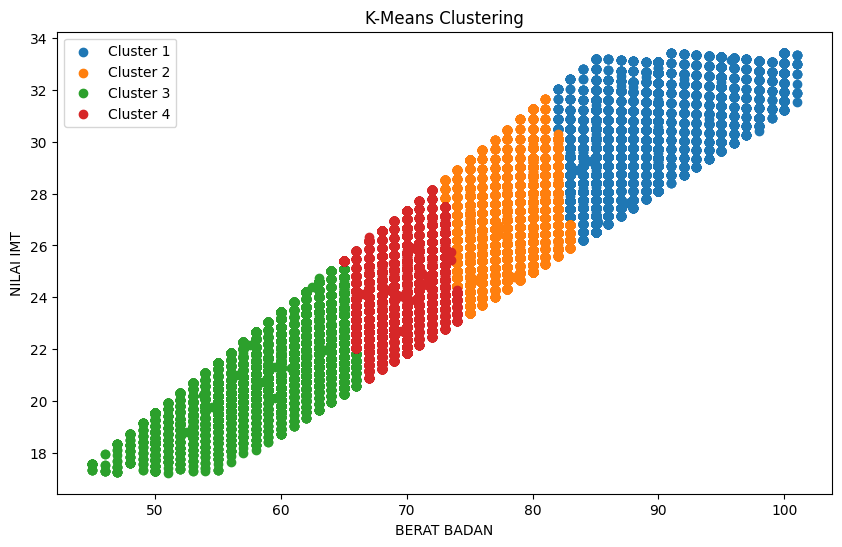

In [ ]:
columns_to_cluster = ['BERAT BADAN', 'NILAI IMT']
Y = KMeansClusteringParallel(data, columns_to_cluster=columns_to_cluster, K=4)

plot_clusters(Y, columns_to_cluster)

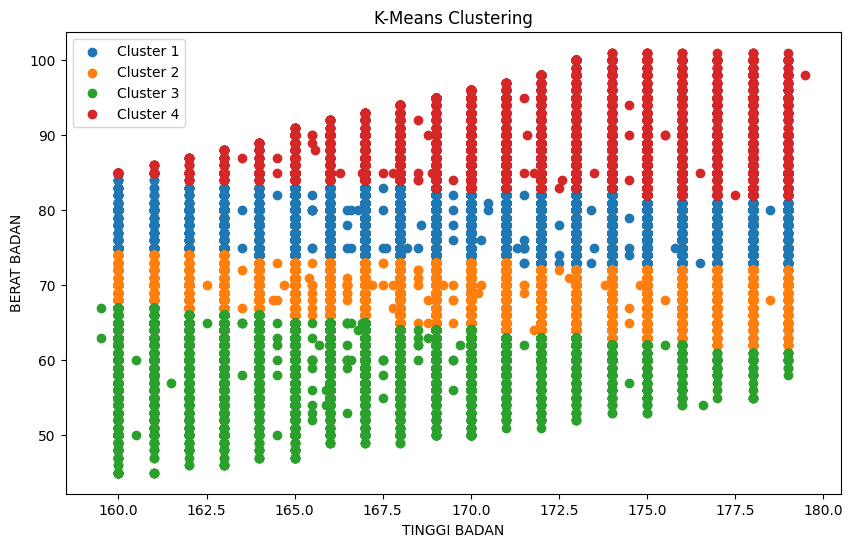

In [ ]:
columns_to_cluster = ['TINGGI BADAN', 'BERAT BADAN']
Y = KMeansClusteringParallel(data, columns_to_cluster=columns_to_cluster, K=4)

plot_clusters(Y, columns_to_cluster)

Diketahui bahwa durasi waktu yang diperlukan dengan program parallel adalah 0.5235445499420166 sementara tanpa program parallel adalah 103.46909713745117. Dengan demikian, terlihat bahwa penggunaan program parallel pada k-Means Clustering lebih efisien dibandingkan tanpa parallel.

#TASK 4

## Insight dari (1) dan (2)

Terlihat bahwa
distribusi IMT berdasarkan jenis kelamin menunjukkan bahwa laki-laki cenderung lebih memiliki IMT yang lebih tinggi secara keseluruhan dibandingkan perempuan.

Terlihat mayoritas data berbentuk kategorik sehingga harus dilakukan pengubahan type variabel menjadi numerik.

Terdapat korelasi yang cukup tinggi antara varibel IMT dan variabel berat badan, Nilai IMT serta aktifitas fisik sehingga variabel tersebut yang dapat berpengaruh terhadap variabel IMT
Hasil yang didapatkan pada pengelompokan K-Means sudah sesuai ekspektasi, akan tetapi hasil akan lebih baik apabila jumlah iterasi ditingkatkan